# Workshop: Scope of variables

by [Luciano Gabbanelli](https://www.linkedin.com/in/luciano-gabbanelli)

<img style="margin-right: 50px;" width=80 src="https://media.giphy.com/media/KAq5w47R9rmTuvWOWa/giphy.gif">

<img width=80 src="../../logos/Assembler.png">

***

## The `id()` function

The `id()` function returns a unique id (unique integer -identity-) for the specified object.

All objects in Python has its own unique id.

The id is assigned to the object when it is created.

The id of an object is its memory address, which will be different each time the program is run, with the exception of certain objects that have a constant unique id, such as integers from -5 to 256 due to integer interning, and some strings due to string interning.

> **Syntax**: `id(object)`
>
> `object` can be a class, variable, list, tuple, set, etc.

Let us start by defining some lists to begin our discussion:

In [ ]:
list_1 = [1,2,3]
list_2 = [1,2,3]
list_9 = [3,2,1]

In [ ]:
print(id(list_1),id(list_2), id(list_9), sep='\n')

In [ ]:
print(list_1 == list_9[::-1])
print(list_1 == list_2)
print(list_1 is list_2)

The last statement is **False** because the memory address is not the same!

**They are not the same object!!**

<p align="center">

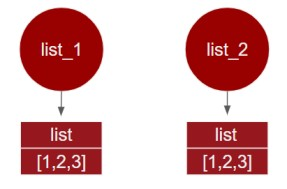

</p>

Now, let us define a new list equal to `list_1`

In [ ]:
list_3 = list_1

In [ ]:
print(id(list_3)==id(list_1))

Clearly, both lists have the same content. Let us see what happens if we include new element into the list:

In [ ]:
list_3.append(4)

In [ ]:
print(list_3)

In [ ]:
print(list_1)

In [ ]:
print(id(list_1))
print(id(list_3))
print(id(list_2))

In [ ]:
list_1 is list_3

The last statement is **True** because the memory address is actally the same! 

**They are actually the same object!!**

<p align="center">

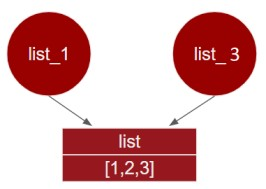

</p>

### Integer interning

is a memory optimization technique that pre-allocates memory for integers in a certain range. This means that for these integers, Python will create a single integer object and all variables assigned with the same value within this range will reference the same object.

These integers are used so frequently that this optimization helps save memory and eliminates the need to create a new object for each instance of these commonly used integers. It also improves performance because it allows Python to use faster identity comparisons (`is`) instead of equality comparisons (`==`) for integers in this range.

In [ ]:
a = 5
b = 5
c = 257
d = 257

In [ ]:
print(f'''a has the same id() as b? {a is b}
c has the same id() than d? {c is d}''')

In [ ]:
id(a)

In [ ]:
a = a+1

In [ ]:
id(a) == id(6)

Other optimization technique is string interning, where strings that are identical to each other use the same memory space.

Interning strings can lead to performance improvements, especially in programs that compare strings frequently, since identity checks are faster than string equality checks.

## Variable scope

refers to the context in which a variable is defined and where it can be accessed or modified (the region where a variable is recognized).

Python, like many other programming languages, has both local and global scopes.

### Local variables

is one that is declared inside a function (or block) and is only accessible within that function (or block).

**Lifetime:** of a local variable is limited to the execution of the function (or block). Once the function execution is complete, the local variable is destroyed.

In [ ]:
def display_name():
    # This is a local variable and has a local scope (available only indise this function)
    name = 'Winona Ryder'
    print(f'How are you, {name}?')

# Executing the function prints the local variable's value
display_name()

`name` is only available within the function where it was created (local scope).

**We cannot access local variables from outside the funcition!**

In [ ]:
name

### Global variables

Global variables are declared outside of functions, within the module that we are currently working in.

In [ ]:
# This is a global variable and has a global scope (available inside and outside functions)
name = 'Lucho'

In [ ]:
print(name)

Global variables are available inside and outside from any function:

In [ ]:
def display_name_global():
    print(f'My name is {name}!')

# Executing the function prints the global variable's value
# Recall that Winona Ryder has been distroyed after display_name() ends its execution
display_name_global()

Regarding best practices, relying on global variables can lead to code that is difficult to understand and maintain. 

* Debugging Difficulty: If `name` is altered in different parts of the program, it might be difficult to track where, how, and why its value is changing.
* **Testing Challenges:** Functions that depend on global variables are harder to test because they depend on the external state.
* **Lack of Reusability:** Functions that use global variables are less reusable in different contexts since they don't work independently of the surrounding code.
* **Concurrency Issues:** In a multi-threaded environment, global variables can lead to race conditions and require careful synchronization.

It would be better to do:

In [ ]:
def display_name_global(my_name):
    print(f'My name is {my_name}!')

# Executing the function prints the global variable's value
display_name_global(name)

This way, `display_name_global()`  is more flexible and clear about its dependencies.

### Global and local variables toghether

It is entirely possible to have both global and local versions of a variable with the same name.

Let's say we have a global and a local variable, both named `name`.

The global variable has been defined previously, and we can refer to it as follows:

In [ ]:
name

As can be seen, we have both a global and a local version of a variable named `name`:

In [ ]:
display_name()

Remember that the function containing a local variable named `name` has already been defined, as well as a global variable with the same name.

> ``` 
> name = 'Lucho'   
> # global scope (available inside and outside functions)
> 
>
> def display_name():
>
>       name = 'Winona Ryder'
>       # local scope (available only indise this function)
>
>       print(f'How are you, {name}?')
>```

If both are used, the local version of the variable will always be utilized within the function's scope when available.

In [ ]:
print(f"name's identifierier: {id(name)}")

In [ ]:
def my_name():
    name = 'Winona Ryder'
    print(f'How are you, {name}? Your variable identifier is {id(name)}')

my_name()

**If there is no local variable, Python will use the global version istead.**

<p align="center">

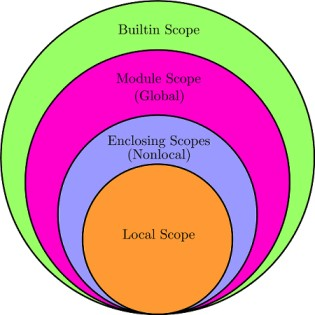

</p>

Python uses the LEGB rule:

> ```
>      L = Local Scope
> 
>      E = Enclosing (Nonlocal) Scope
>
>      G = Global (Module) Scope
>
>      B = Built-in Scope
> ```  

## Watch out!

We can globalize variables:

In [ ]:
hola = 'Una cosa global'

def my_sum(my_list, *integers):

    hola = 'Otra cosa local' # local scope (available only indise this function)
    
    result = 0

    for item in my_list:
        result += item
        
    for x in integers:
        result += x
    
    print('Local variable named "hola":', hola, id(hola), end='\n\n')
    print('''If we execute the function we will see its output (what it returns), 
unless we assign the output to new variables.
If we want to use this output later, we should assign it to new variables''')

    return result, hola

In [ ]:
my_sum([1,2,3], 4,5)

Clearly, we can not access the `result` variable because its scope is local to the function:

In [ ]:
result

Unless, we globalize the variable:

In [ ]:
# We have the global variable called "name"
print('Global variable:', hola, '-> with identifier:', id(hola), end='\n\n')

# and we override our global variable with the output of the function
result, hola = my_sum([1,2,3], 4)

In [ ]:
print("We have 'globalized' our local variable:", hola, '-> with identifier:', id(hola))
print('Now, our variable "hola" has global scope with the id assigned to it when it was defined inside the function!')

## Enclosing scopes

Enclosing (or nonlocal) scope is a special scope that only exists for nested functions.

If the local scope is an inner or nested function, then the enclosing scope is the scope of the outer or enclosing function. 

Therefore, the local scope has access to the variables that we define in the enclosing function.

In [ ]:
# We define a Modular (Global) variable
z='!'

def myfunc():
    x = 'This variable is defined outside the most inner function, '
    
    def myinnerfunc():
        y = 'but it is available inside the most inner function'
        print(x+y+z)
    
    myinnerfunc()

In [ ]:
myfunc()

In [ ]:
z

In [ ]:
x

In [ ]:
y

Clearly, neither `x` nor `y` is available outside of either function.

* We cannot use `y` outside `myinnerfunc()`.

* We cannot use `x` outside `myfunc()`, but we can use `x` inside `myfunc()` or `myinnerfunc()`.

<br>

<h1><center>
    <span style="color:blue"> Unless we use the global keyword!!! </span>
    </center></h1>

## The Global Keyword

The `global` keyword makes the variable global:

In [ ]:
def myfunc():
    global x
    x = 'This variable is defined outside the most inner function, '
    
    def myinnerfunc():
        global y
        y = 'but it is available inside the most inner function'
        print(x+y+z)
    
    myinnerfunc()

In [ ]:
myfunc()

In [ ]:
print(x+y+z+ '\n\nIf we use the global keyword, now both variables are available outside the functions.')

###  Other uses

Additionally, the `global` keyword allows us to modify global variables from within a function's scope.

In [ ]:
x = 300
print(x, '->', id(x))

x = 3
print(x, '->', id(x))

def myfunc():
    global x
    x = 200
    print(x, '->', id(x))

In [ ]:
myfunc()
print()
print(x, '->', id(x))

**Warning:** Using the `global` keyword is generally not considered a good practice, especially in larger or more complex programs.

Instead of using global variables, it's often recommended to:

* **Pass Variables as Parameters:** Instead of relying on a global variable, pass it as a parameter to your functions. This makes dependencies explicit and clear.

* **Return Values:** Have functions return values instead of directly modifying globals. This can make the flow of data more obvious and easier to follow.

* **Encapsulation:** Use classes to encapsulate data and provide methods to operate on that data, which can help keep state and behavior together.

[Check this article!](https://favtutor.com/blogs/nonlocal-python#:~:text=The%20main%20difference%20is%20that,scope%20that%20is%20not%20global.)